In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import eda_helper_functions


In [2]:
file_path = r"C:\Users\Samar mubark\Desktop\flight_price_prediction\data\train.csv"
t_data = pd.read_csv(file_path)

In [3]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [4]:
t_data.dtypes

airline             object
date_of_journey     object
source              object
destination         object
dep_time            object
arrival_time        object
duration             int64
total_stops        float64
additional_info     object
price                int64
dtype: object

In [5]:
# t_data['dep_time'] = pd.to_datetime(t_data['dep_time'], format='%H:%M:%S').dt.time
# t_data['arrival_time'] = pd.to_datetime(t_data['arrival_time'], format='%H:%M:%S').dt.time
t_data = t_data.assign(**{
    col: pd.to_datetime(t_data.loc[:,col],dayfirst = True)
    for col in ["date_of_journey","dep_time","arrival_time"]
})


In [ ]:
# # Convert date_of_journey to datetime format
# t_data['date_of_journey'] = pd.to_datetime(t_data['date_of_journey'], dayfirst=True)

# # Convert dep_time and arrival_time to datetime format and extract only the time component
# t_data['dep_time'] = pd.to_datetime(t_data['dep_time'], format='%H:%M:%S').dt.time
# t_data['arrival_time'] = pd.to_datetime(t_data['arrival_time'], format='%H:%M:%S').dt.time

# # Display the first few rows to verify the changes
# t_data.head()


In [6]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-07-02 08:55:00,2024-07-02 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-02 17:30:00,2024-07-02 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-07-02 11:40:00,2024-07-02 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-07-02 09:25:00,2024-07-02 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-07-02 22:55:00,2024-07-02 07:40:00,525,1.0,In-flight meal not included,11087


In [7]:
t_data.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

In [11]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-07-02 08:55:00,2024-07-02 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-02 17:30:00,2024-07-02 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-07-02 11:40:00,2024-07-02 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-07-02 09:25:00,2024-07-02 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-07-02 22:55:00,2024-07-02 07:40:00,525,1.0,In-flight meal not included,11087


In [12]:
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6695 entries, 0 to 6694
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6695 non-null   object        
 1   date_of_journey  6695 non-null   datetime64[ns]
 2   source           6695 non-null   object        
 3   destination      6695 non-null   object        
 4   dep_time         6695 non-null   datetime64[ns]
 5   arrival_time     6695 non-null   datetime64[ns]
 6   duration         6695 non-null   int64         
 7   total_stops      6694 non-null   float64       
 8   additional_info  6695 non-null   object        
 9   price            6695 non-null   int64         
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 523.2+ KB


In [13]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,2024-07-02 08:55:00,2024-07-02 19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,2024-07-02 17:30:00,2024-07-02 04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,2024-07-02 11:40:00,2024-07-02 14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,2024-07-02 09:25:00,2024-07-02 18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,2024-07-02 22:55:00,2024-07-02 07:40:00,525,1.0,In-flight meal not included,11087


In [14]:
t_data.describe(include = "number")

,duration,total_stops,price
count,6695.000000,6694.000000,6695.000000
mean,633.489171,0.801464,9030.965646
std,503.006311,0.659737,4639.522857
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5224.000000
50%,510.000000,1.000000,8283.000000
75%,922.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [13]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [15]:
(
    t_data
    .assign(total_stops=t_data["total_stops"].astype(object))
    .describe(include="O")
    
    
)

,airline,source,destination,total_stops,additional_info
count,6695,6695,6695,6694.0,6695
unique,12,5,6,4.0,7
top,Jet Airways,Delhi,Cochin,1.0,No Info
freq,2386,2730,2730,3580.0,5249


In [15]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087


In [16]:
from sklearn.ensemble import IsolationForest

In [17]:
forest = IsolationForest(n_estimators = 10)


In [18]:
t_data.head(5)
# Drop rows with missing values
t_data = t_data.dropna()

# Verify that there are no missing values left
print(t_data.isnull().sum())


airline            0
date_of_journey    0
source             0
destination        0
dep_time           0
arrival_time       0
duration           0
total_stops        0
additional_info    0
price              0
dtype: int64


In [19]:
(t_data
 
 .assign(outliers=forest
         .fit_predict(
          t_data
         .select_dtypes(include ="number")
         ))
 
 .drop(columns ="price")
 .query("outliers==-1")
)
 



,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,outliers
7,Spicejet,2019-06-15,Mumbai,Hyderabad,05:45:00,07:15:00,90,0.0,No check-in baggage included,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,23:05:00,04:25:00,1760,2.0,No Info,-1
12,Jet Airways,2019-06-24,Delhi,Cochin,21:25:00,19:00:00,1295,2.0,No Info,-1
14,Jet Airways,2019-06-06,Kolkata,Banglore,18:55:00,22:35:00,1660,1.0,In-flight meal not included,-1
21,Jet Airways,2019-06-01,Delhi,Cochin,18:25:00,12:35:00,1090,2.0,No Info,-1
...,...,...,...,...,...,...,...,...,...,...
6679,Jet Airways,2019-03-06,Delhi,Cochin,02:15:00,04:25:00,1570,1.0,No Info,-1
6683,Jet Airways,2019-05-01,Kolkata,Banglore,09:35:00,14:25:00,1730,1.0,No Info,-1
6687,Air India,2019-06-06,Kolkata,Banglore,05:50:00,08:55:00,1625,2.0,No Info,-1
6688,Jet Airways,2019-06-15,Delhi,Cochin,21:25:00,12:35:00,910,2.0,In-flight meal not included,-1


In [20]:
numeric_cols = t_data.select_dtypes(include='number').columns

# Apply IsolationForest
forest = IsolationForest(n_estimators=10)
t_data['outliers'] = forest.fit_predict(t_data[numeric_cols])

# Display the first few rows to verify the changes
t_data.head()


,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outliers
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832,1
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540,1
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305,1
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366,1
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087,1


In [21]:
t_data.head(5)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outliers
0,Jet Airways,2019-03-21,Banglore,New Delhi,08:55:00,19:10:00,615,1.0,In-flight meal not included,7832,1
1,Jet Airways,2019-03-27,Delhi,Cochin,17:30:00,04:25:00,655,1.0,In-flight meal not included,6540,1
2,Goair,2019-03-09,Banglore,New Delhi,11:40:00,14:35:00,175,0.0,No Info,7305,1
3,Air India,2019-06-12,Kolkata,Banglore,09:25:00,18:30:00,545,1.0,No Info,8366,1
4,Jet Airways,2019-03-12,Banglore,New Delhi,22:55:00,07:40:00,525,1.0,In-flight meal not included,11087,1


In [22]:
t_data.describe(include = "number")

,duration,total_stops,price,outliers
count,6694.000000,6694.000000,6694.000000,6694.000000
mean,633.371676,0.801464,9031.197341,0.504033
std,502.951999,0.659737,4639.830703,0.863749
min,75.000000,0.000000,1759.000000,-1.000000
25%,170.000000,0.000000,5224.000000,1.000000
50%,510.000000,1.000000,8283.000000,1.000000
75%,920.000000,1.000000,12373.000000,1.000000
max,2860.000000,3.000000,62427.000000,1.000000


# Now we will do analysis of each column of our dataset USing our helper function

In [23]:
eda_helper_functions.cat_summary(t_data, "airline")

0       Jet Airways
1       Jet Airways
2             Goair
3         Air India
4       Jet Airways
           ...     
6690    Jet Airways
6691      Air India
6692    Jet Airways
6693       Air Asia
6694      Air India
Name: airline, Length: 6694, dtype: object

Data Type      : object
Cardinality    : 12 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,694 / 6,694 rows


,
count,6694
unique,12
top,Jet Airways
freq,2386


,count,percentage
category,,
Jet Airways,2386,0.356439
Indigo,1296,0.193606
Air India,1075,0.160592
Multiple Carriers,730,0.109053
Spicejet,537,0.080221
Vistara,319,0.047655
Air Asia,211,0.031521
Goair,125,0.018673
Multiple Carriers,6,0.000896


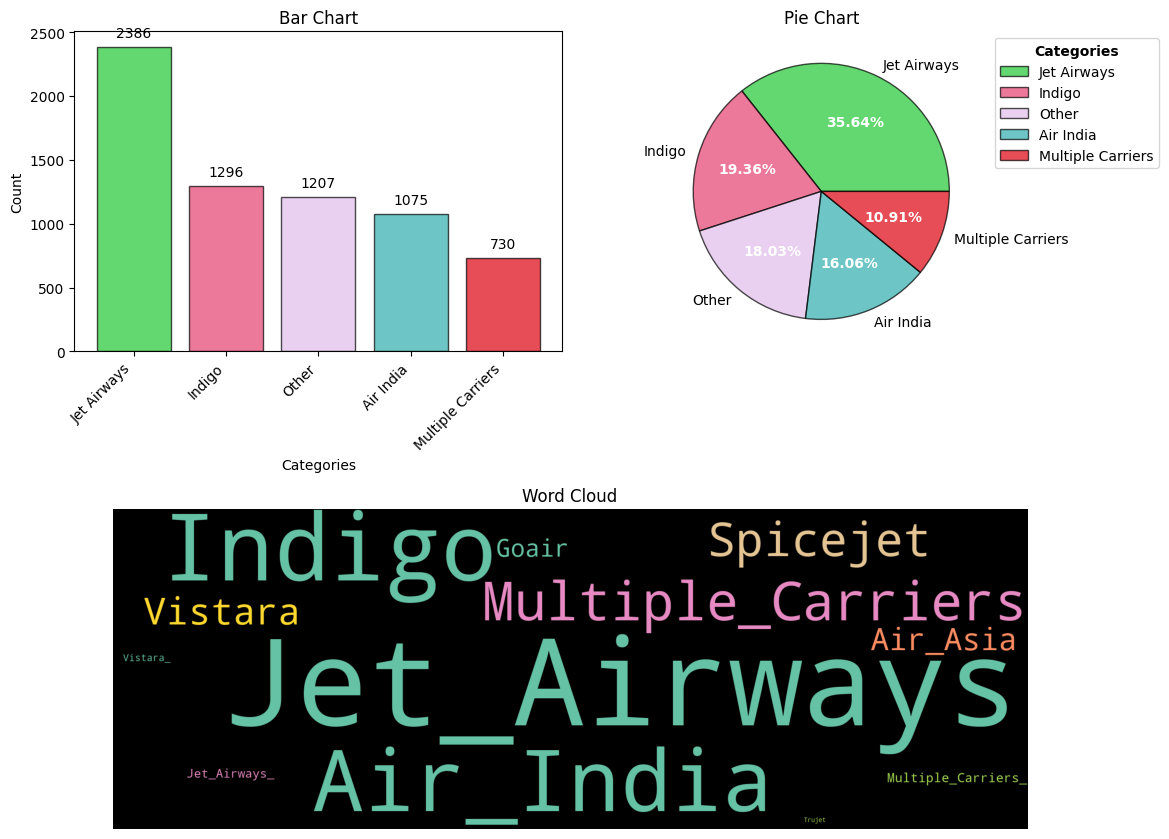

In [27]:
eda_helper_functions.cat_univar_plots(t_data, "airline",k=4)

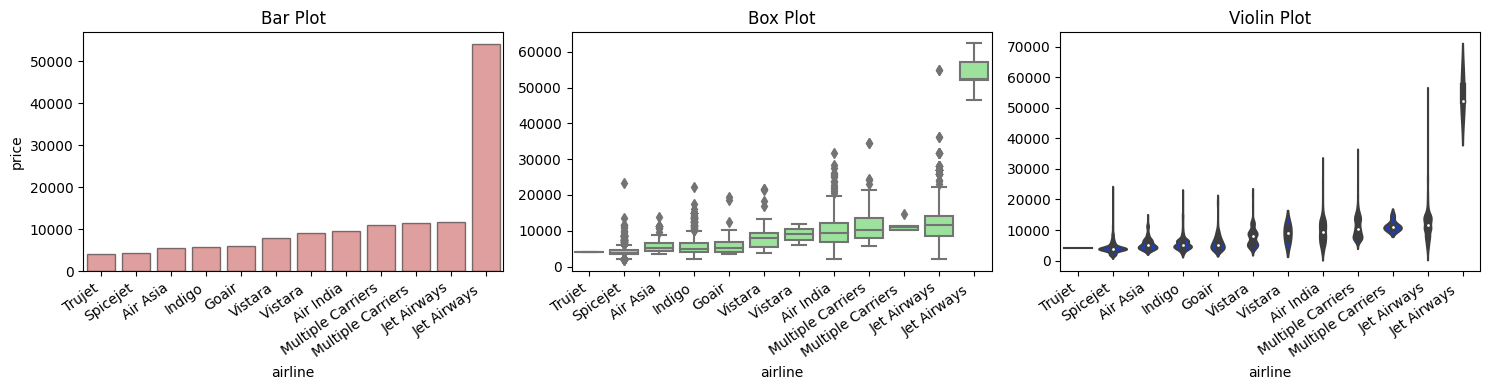

In [31]:
eda_helper_functions.num_cat_bivar_plots(data= t_data, num_var = "price" , cat_var = "airline")

In [32]:
eda_helper_functions.num_cat_hyp_testing(t_data, "price", "airline")

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 447.1685899573632
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3137.5099060146963
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


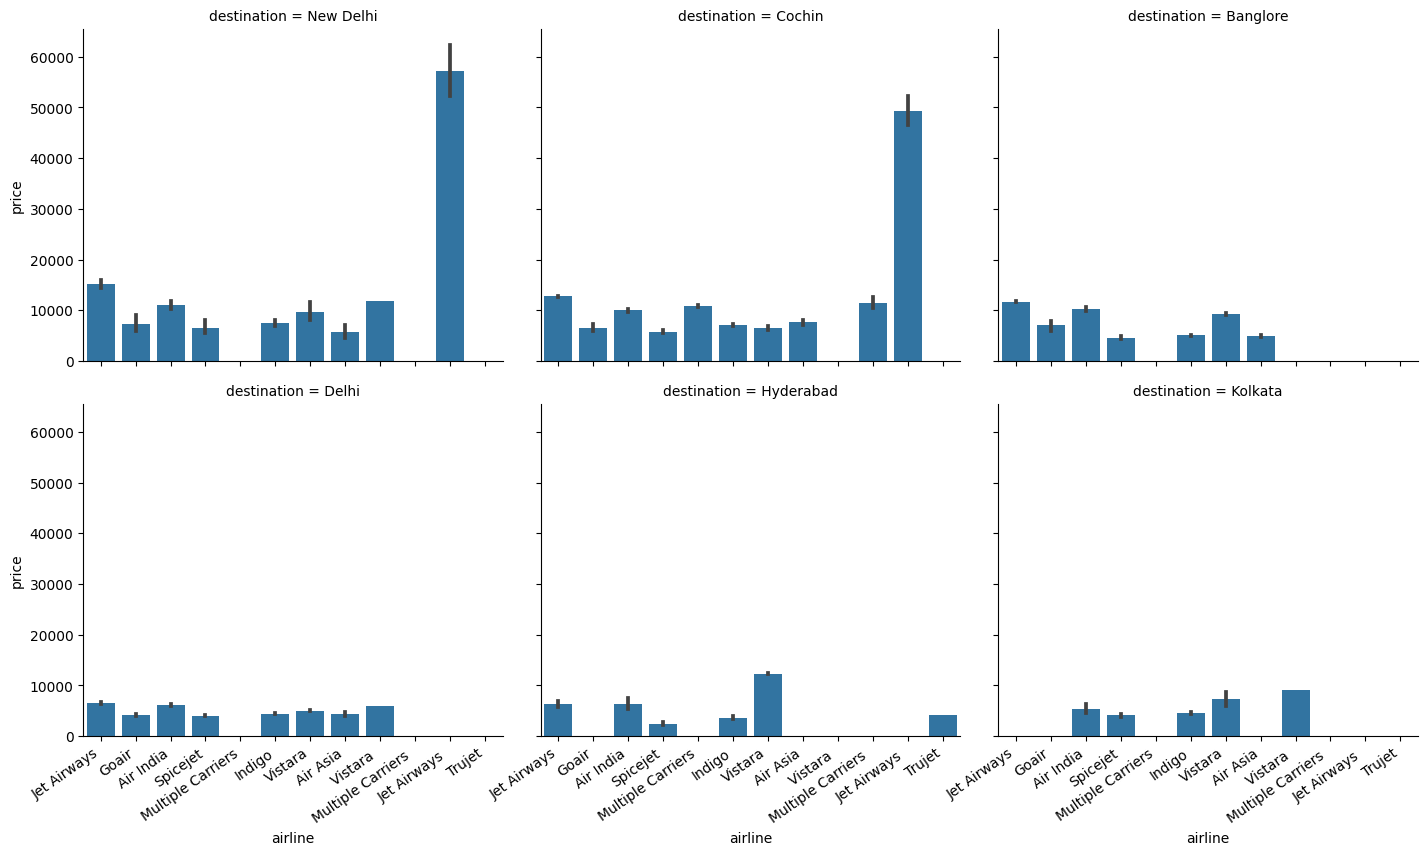

In [41]:
airline_grid = sns.FacetGrid(data = t_data ,
                            col = "destination",
                            col_wrap =3,
                            sharey = True,
                            height = 4,
                            aspect = 1.2
                        )

airline_grid.map(sns.barplot, "airline" , "price" , order = t_data.airline.unique())

for axe in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(axe)

# date of journey

In [43]:
t_data.date_of_journey

0      2019-03-21
1      2019-03-27
2      2019-03-09
3      2019-06-12
4      2019-03-12
          ...    
6690   2019-03-21
6691   2019-05-01
6692   2019-06-01
6693   2019-06-24
6694   2019-03-01
Name: date_of_journey, Length: 6694, dtype: datetime64[ns]

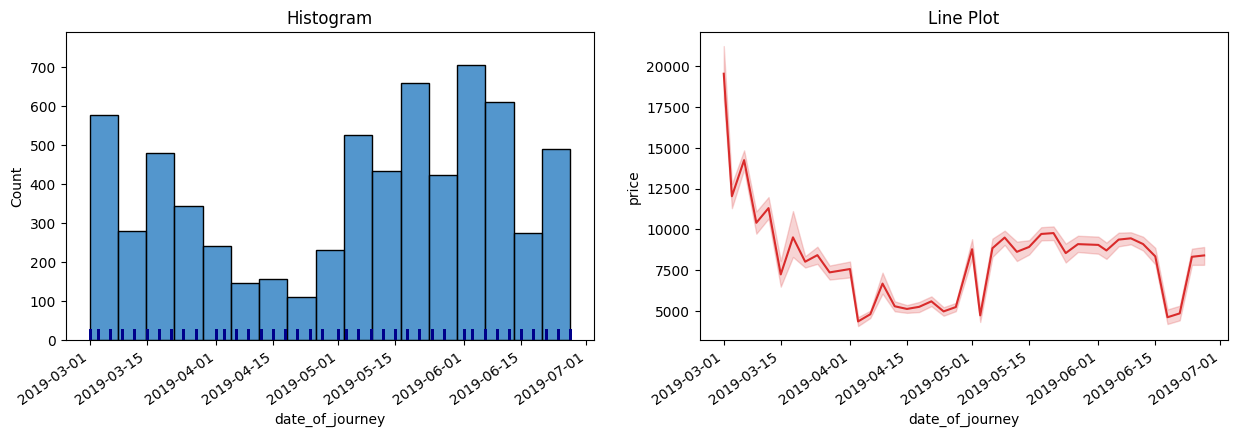

In [45]:
eda_helper_functions.dt_univar_plots(
   data=t_data,
   var="date_of_journey",
   target="price"
)

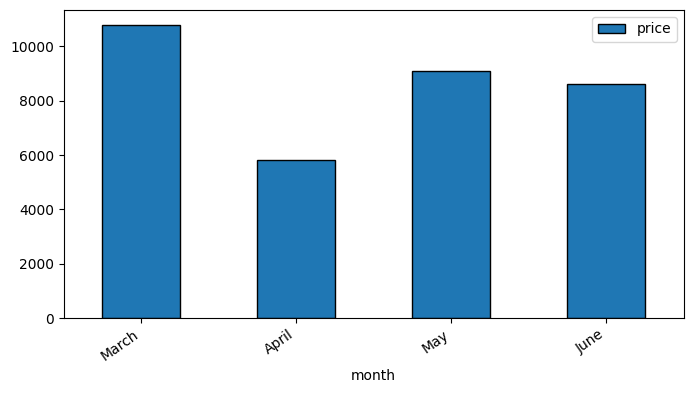

In [52]:
(
    t_data
    .groupby(pd.Grouper(key="date_of_journey", freq="M"))
    .price.mean()
    .to_frame()
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
)
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

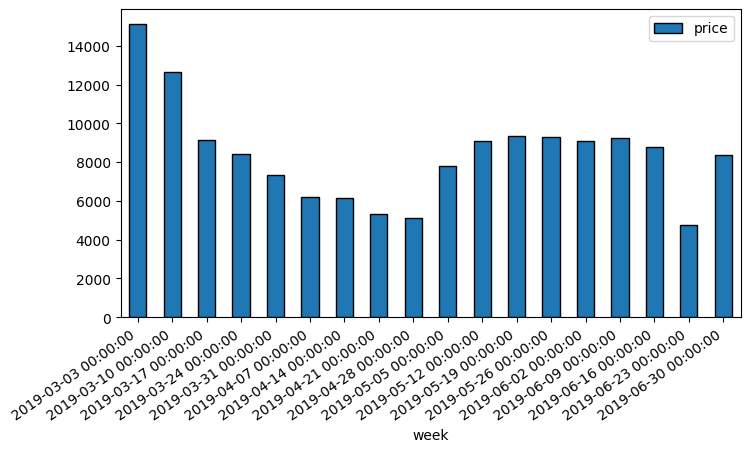

In [54]:
(
    t_data
    .groupby(pd.Grouper(key="date_of_journey", freq="W"))
    .price.mean()
    .to_frame()
    .rename_axis(index="week")
    .plot(
        kind="bar",
        figsize=(8, 4),
        edgecolor="black"
        )
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

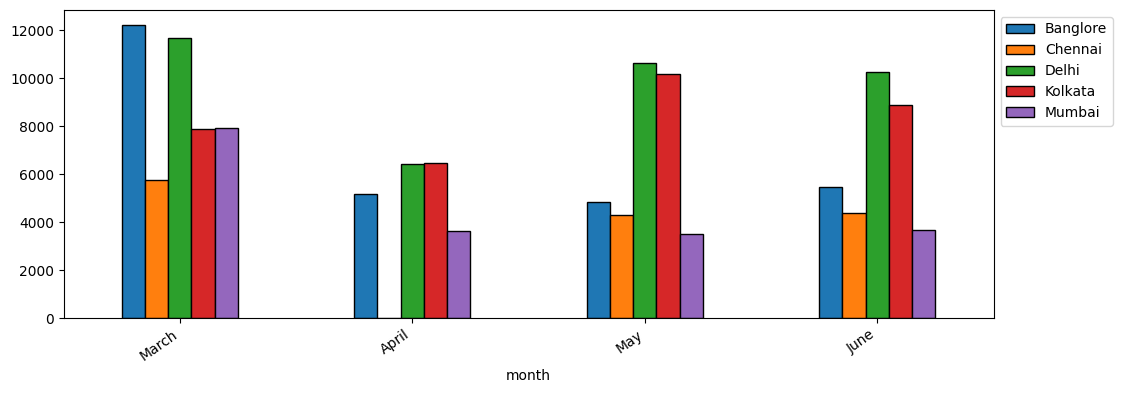

In [56]:
(
    t_data
    .groupby([pd.Grouper(key="date_of_journey", freq="M"), "source"])
    .price.mean()
    .unstack(fill_value=0)
    .set_axis(["March", "April", "May", "June"], axis=0)
    .rename_axis(index="month")
    .plot(
        kind="bar",
        figsize=(12, 4),
        edgecolor="black"
)
)

ax = plt.gca()

ax.legend(
    loc="upper left",
    bbox_to_anchor=(1, 1)
)

eda_helper_functions.rotate_xlabels(ax)

In [64]:
t_data["dep_time"]

0       08:55:00
1       17:30:00
2       11:40:00
3       09:25:00
4       22:55:00
          ...   
6690    10:45:00
6691    09:25:00
6692    14:00:00
6693    07:55:00
6694    11:50:00
Name: dep_time, Length: 6694, dtype: object

In [8]:
# t_data['dep_time'] = pd.to_datetime(t_data['dep_time'], dayfirst=True)

t_data.dtypes

airline                    object
date_of_journey    datetime64[ns]
source                     object
destination                object
dep_time           datetime64[ns]
arrival_time       datetime64[ns]
duration                    int64
total_stops               float64
additional_info            object
price                       int64
dtype: object

C:\Users\Samar mubark\Desktop\flight_price_prediction\Notebook\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(
C:\Users\Samar mubark\Desktop\flight_price_prediction\Notebook\eda_helper_functions.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(


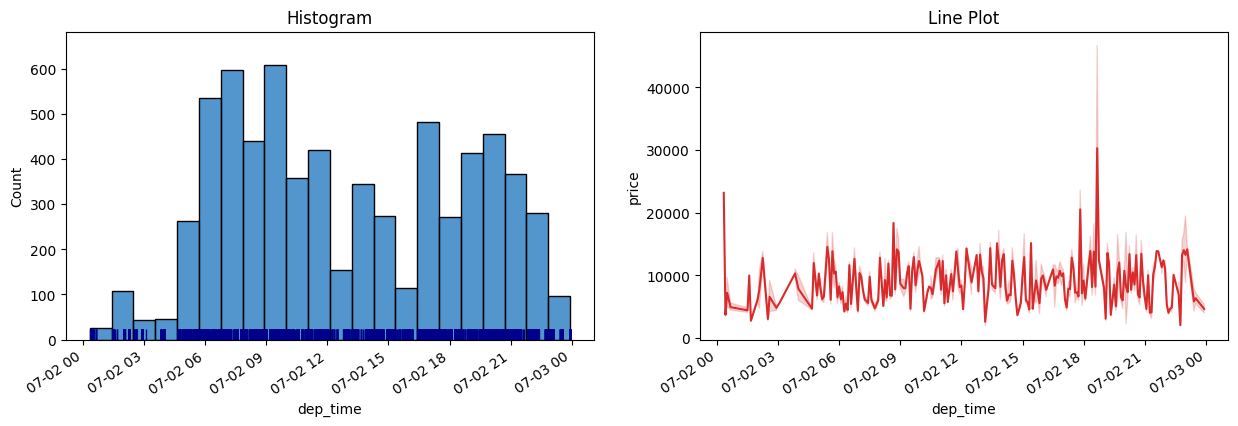

In [9]:
eda_helper_functions.dt_univar_plots(t_data,"dep_time", "price" )

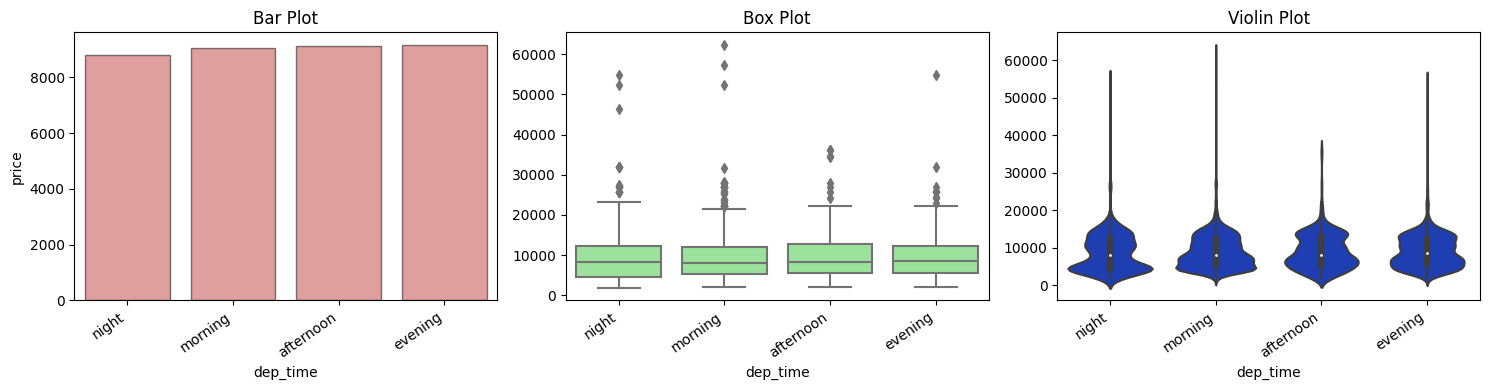

In [10]:
(
	t_data
	.assign(dep_time=lambda df_: (
		np.select([df_.dep_time.dt.hour.between(4, 12, inclusive="left"),
				   df_.dep_time.dt.hour.between(12, 16, inclusive="left"),
				   df_.dep_time.dt.hour.between(16, 20, inclusive="left")],
				  ["morning", "afternoon", "evening"],
				  default="night")
	))
	.pipe(eda_helper_functions.num_cat_bivar_plots, "price", "dep_time")
)

# duration analysis

In [12]:
eda_helper_functions.num_summary(t_data, "duration")


0        615
1        655
2        175
3        545
4        525
        ... 
6690    1925
6691     545
6692     300
6693     330
6694    1265
Name: duration, Length: 6695, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,695 / 6,695 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,922.5
90,1440.0
95,1601.5
99,1855.0


,value
mean,633.489171
trimmed mean (5%),599.711299
trimmed mean (10%),571.053761
median,510.000000


,value
var,253015.348516
std,503.006311
IQR,752.500000
mad,340.000000
coef_variance,0.794025


,value
skewness,0.893578
kurtosis,-0.053860


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8865603804588318
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 248.46369663341648
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


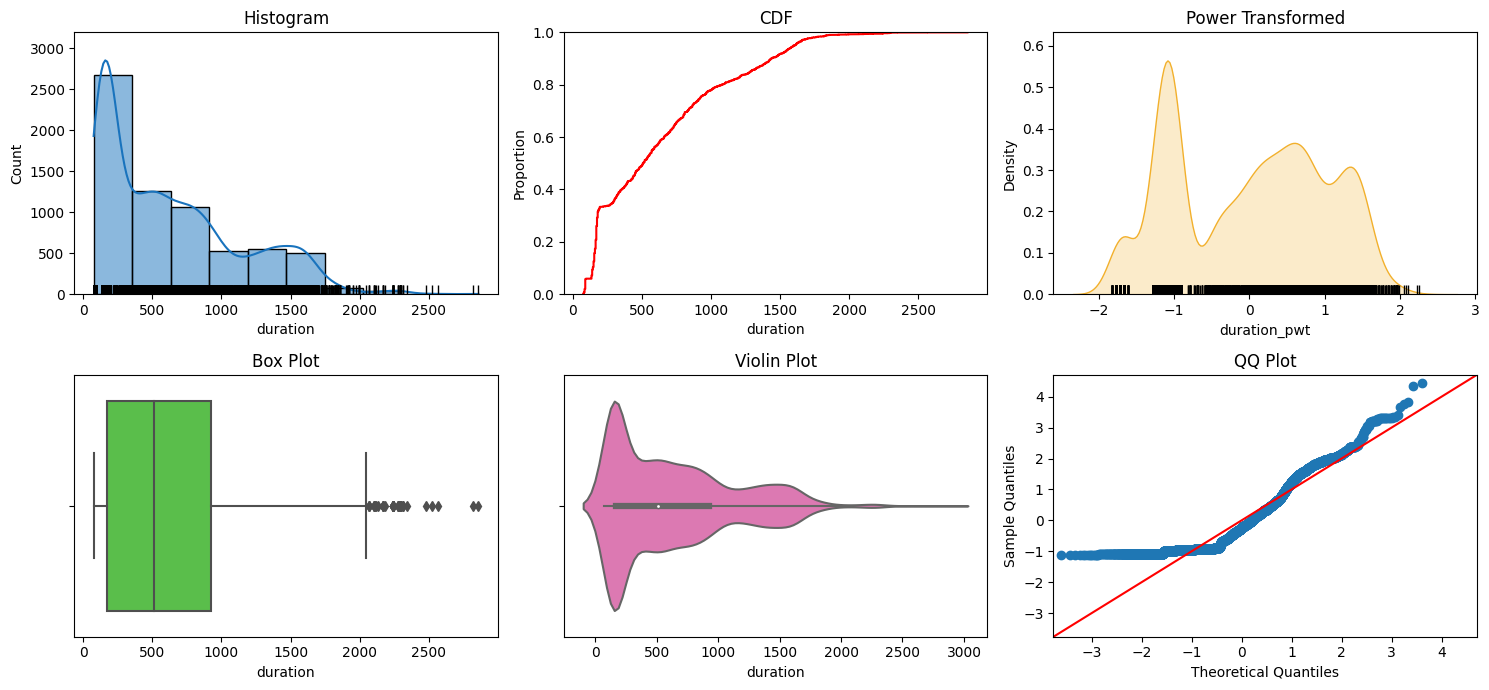

In [13]:
eda_helper_functions.num_univar_plots(t_data, "duration")

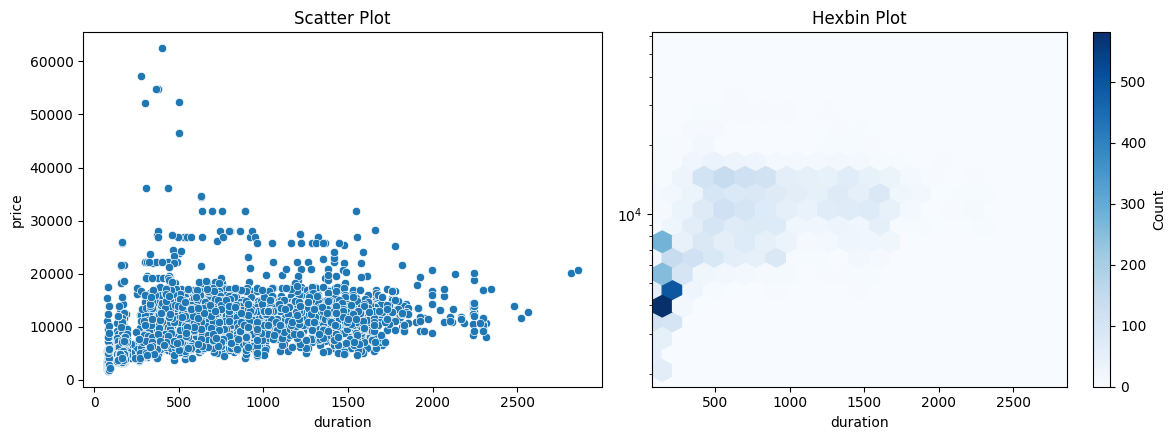

In [15]:
eda_helper_functions.num_bivar_plots(
	t_data,
	"duration",
	"price",
	hexbin_kwargs=dict(
		yscale="log",
		gridsize=20,
		cmap="Blues"
	)
)

In [16]:
eda_helper_functions.num_num_hyp_testing(t_data, "price", "duration")


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5090124491779018
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


AttributeError: 'SpearmanrResult' object has no attribute 'statistic'

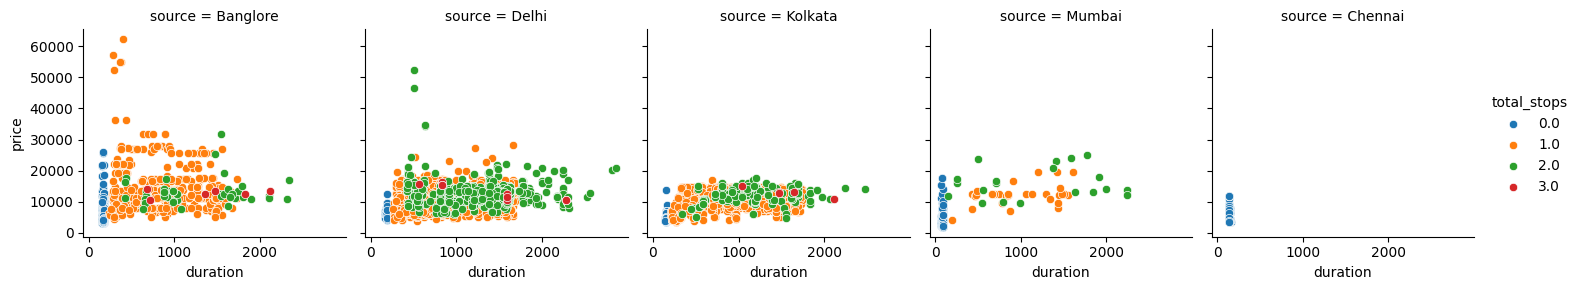

In [17]:
duration_grid = sns.FacetGrid(
	data=t_data,
	col="source",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

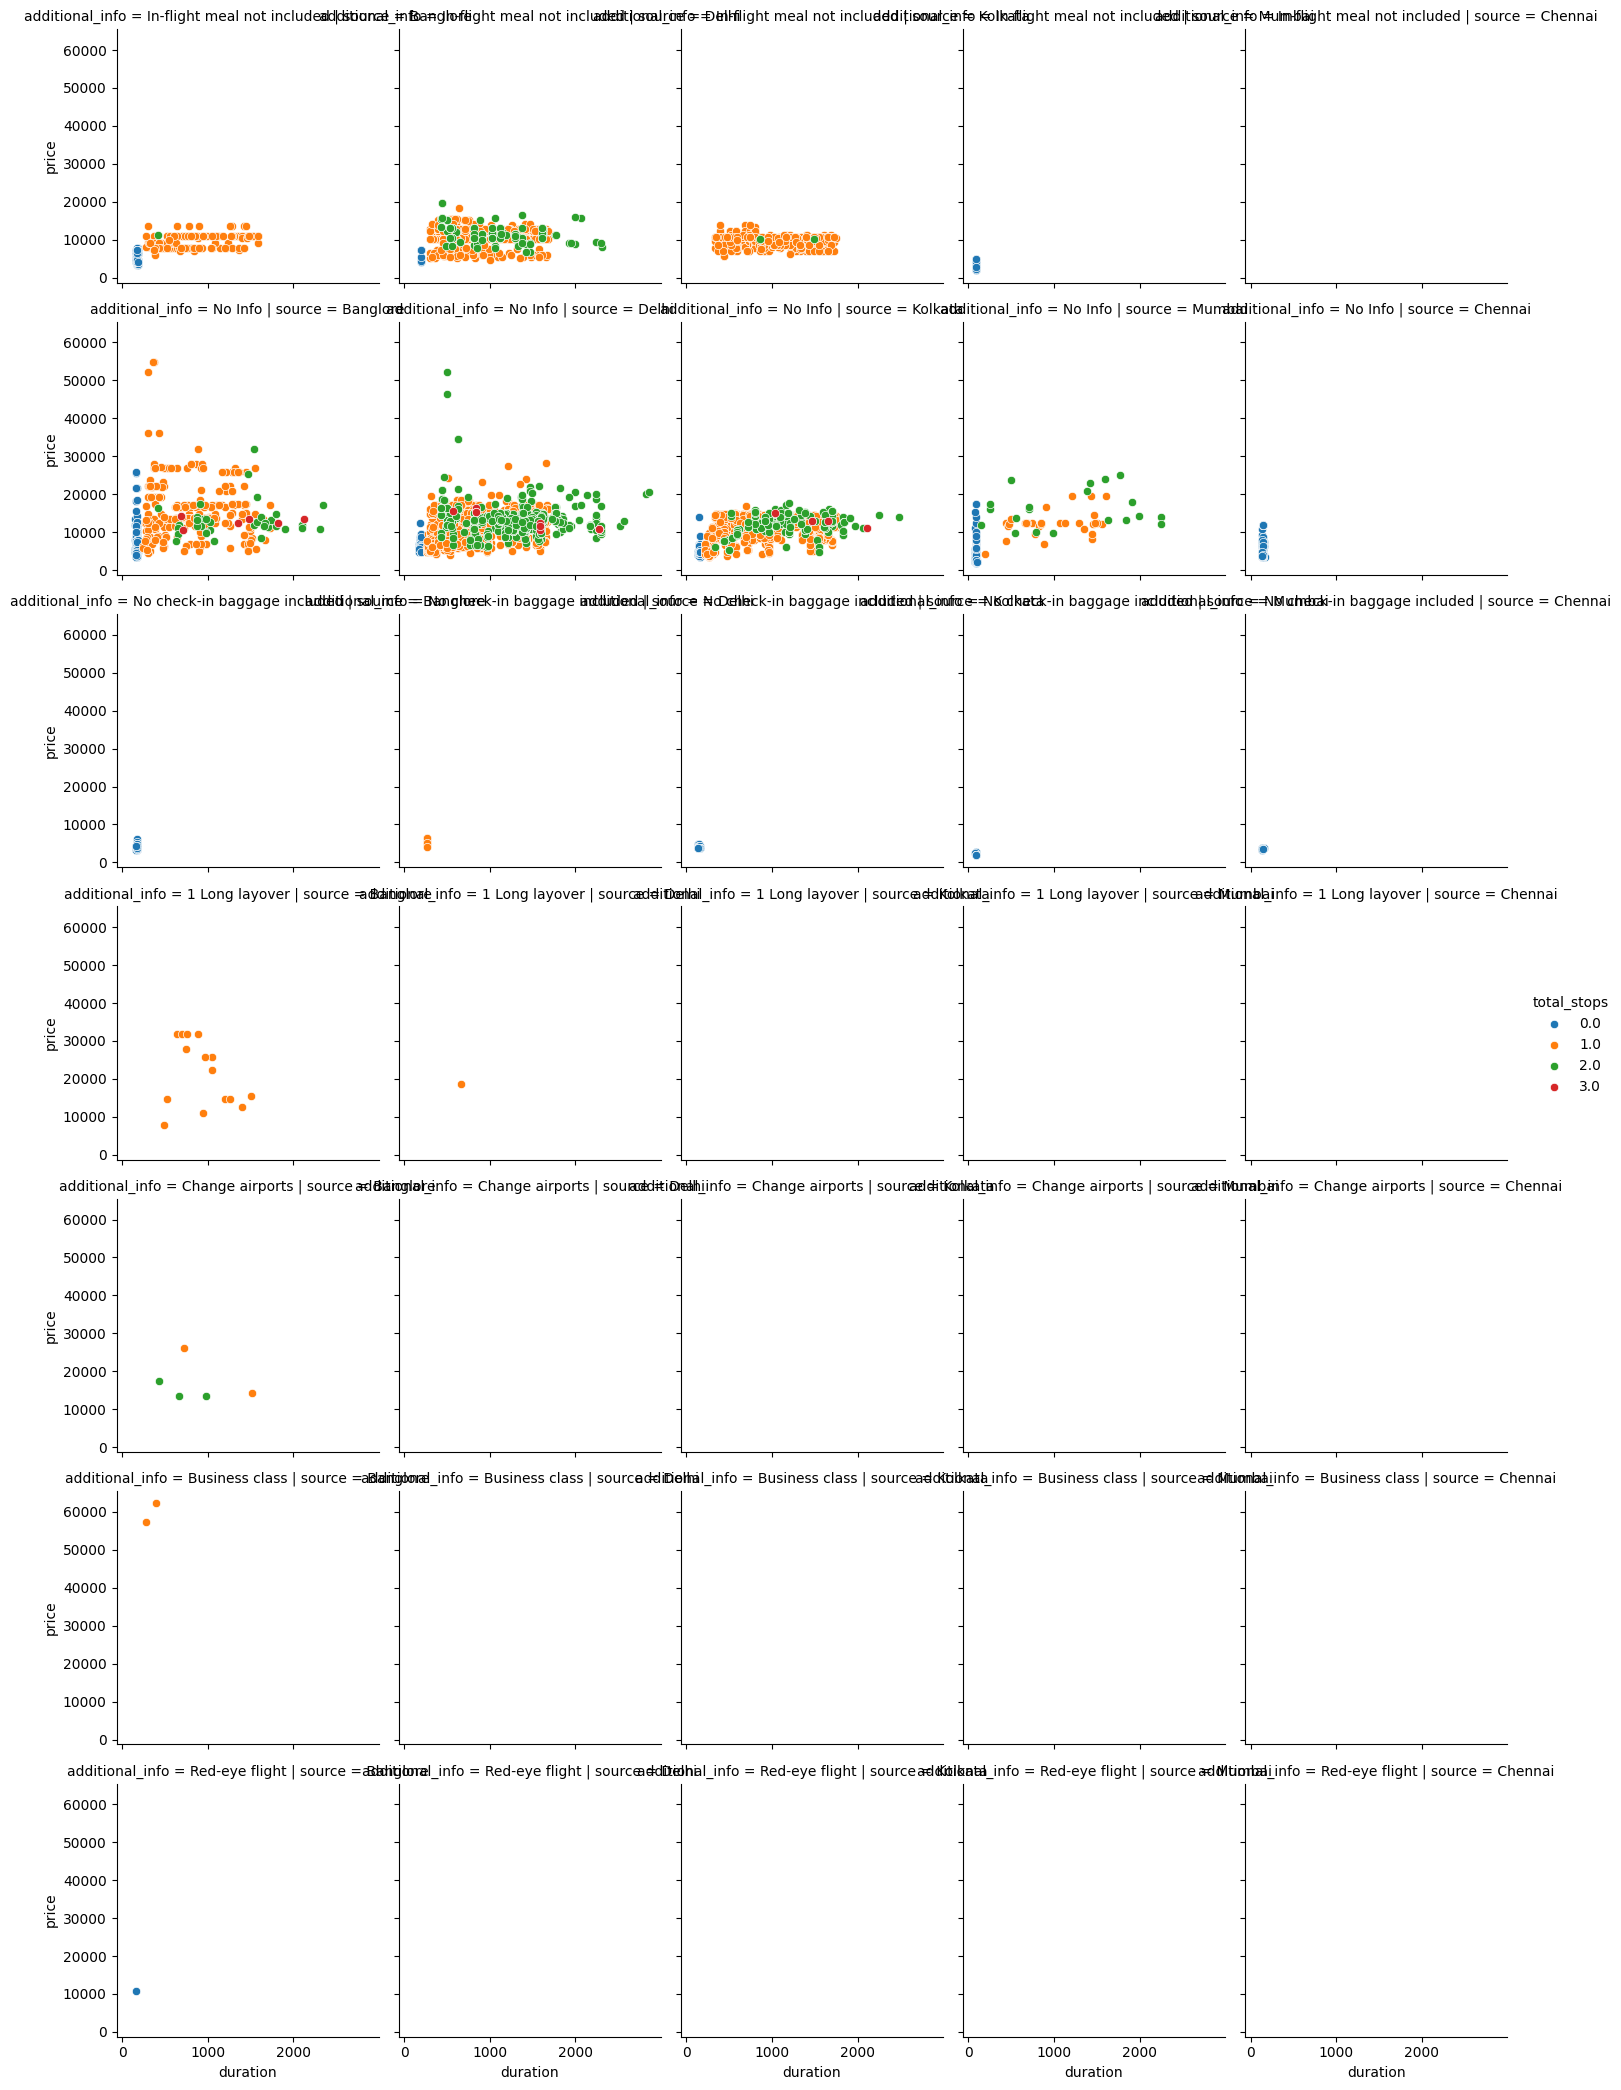

In [19]:
duration_grid = sns.FacetGrid(
	data=t_data,
	col="source",
	row="additional_info",
	hue="total_stops",
	sharey=True
)

duration_grid.map(sns.scatterplot, "duration", "price")

duration_grid.add_legend()

ModuleNotFoundError: No module named 'pydantic'